<a href="https://colab.research.google.com/github/Nasreen69/Temporary_add_to_version_control/blob/main/NLP_SA_AmazonReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scenario: **Analyze Amazon Alexa Reviews using spaCy**

###**What is Natural Language Processing?**

Natural Language Processing (NLP in short) is a branch of artificial intelligence that deals with analyzing, understanding and generating the languages that humans use naturally in order to interface with computers in both written and spoken contexts using natural human languages instead of computer languages. Some of the common use case of NLP in machine learning are: 

- **Topic discovery and modeling:** Capture the meaning and themes in text collections, and apply advanced modeling techniques such as Topic Modeling to group similar documents together.
- **Sentiment Analysis:** Identifying the mood or subjective opinions within large amounts of text, including average sentiment and opinion mining.
- **Document summarization:** Automatically generating synopses of large bodies of text.
- **Speech-to-text and text-to-speech conversion:** Transforming voice commands into written text, and vice versa.
- **Machine translation:** Automatic translation of text or speech from one language to another.  

__[Learn More about Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing)__

###**Dataset Description:**

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.

- **Id**
- **ProductId**
- **UserId**
- **ProfileName**
- **HelpfulnessNumerator**
- **HelpfulnessDenominator**
- **Score**
- **Time**
- **Summary**
- **Text**


###**Tasks to be performed:**

- Download the dataset from dropbox and install dependencies
- Import the required libraries and load the dataset 
- Perfom Exploratory Data Analysis (EDA) on the data set
- Use SpaCy to implement:
 - **Tokenization**
 - **Part of Speech Tagging**
 - **Lemmatization**
 - **Dependency Parsing**
 - **Named Entity Recognition**
- Implement Text Summarization Using **Gensim**
- Use **PyCaret** to implement NLP


###**Downloading the data set from Dropbox and installing dependencies**

In [ ]:
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py

--2022-12-08 04:44:26--  https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6896 (6.7K) [text/plain]
Saving to: ‘explacy.py’

explacy.py          100%[===================>]   6.73K  --.-KB/s    in 0s      

2022-12-08 04:44:26 (60.9 MB/s) - ‘explacy.py’ saved [6896/6896]



In [ ]:
!wget https://www.dropbox.com/s/socxqy7mbtteo65/Reviews.csv

--2022-12-08 04:44:30--  https://www.dropbox.com/s/socxqy7mbtteo65/Reviews.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/socxqy7mbtteo65/Reviews.csv [following]
--2022-12-08 04:44:31--  https://www.dropbox.com/s/raw/socxqy7mbtteo65/Reviews.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6222898d9aa407719a81afc0be.dl.dropboxusercontent.com/cd/0/inline/ByN8FQw7daCFz2jtkwdIaitSx225bOZqpRCkfBjFkoFtDMUqRejokgUIlInJx4UWJQNCl3GDHpaWI30UI8_fPTLqf-Riz-9AxiefLCJzzVbsxEJpzXHL8H01rXyXFMo35fN7OLX8Fm7-LH-F3kTQLTuN0vCcIwqyNLRSgvigr1JckQ/file# [following]
--2022-12-08 04:44:32--  https://uc6222898d9aa407719a81afc0be.dl.dropboxusercontent.com/cd/0/inline/ByN8FQw7daCFz2jtkwdIaitSx225bOZqpRCkfBjFkoFtDMUqRejokgUIlInJx4UWJQNCl3GDHpaWI30UI

###**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

print('Libraries Imported')

Libraries Imported


### ***DataSet OverView***

In [ ]:
#Reading the dataset 
df = pd.read_csv('Reviews.csv')

In [ ]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [ ]:
df.shape

(568454, 10)

In [ ]:
df.groupby('Score').Score.count()

Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: Score, dtype: int64

In [ ]:
df = df.iloc[ :4854,:]
df.shape

(4854, 10)

In [ ]:
df = df[['Score', 'Text']]

In [ ]:
df.groupby('Score').Score.count()

Score
1     453
2     279
3     385
4     689
5    3048
Name: Score, dtype: int64

In [ ]:
df.shape

(4854, 2)

###**Exploratory Data Analysis**

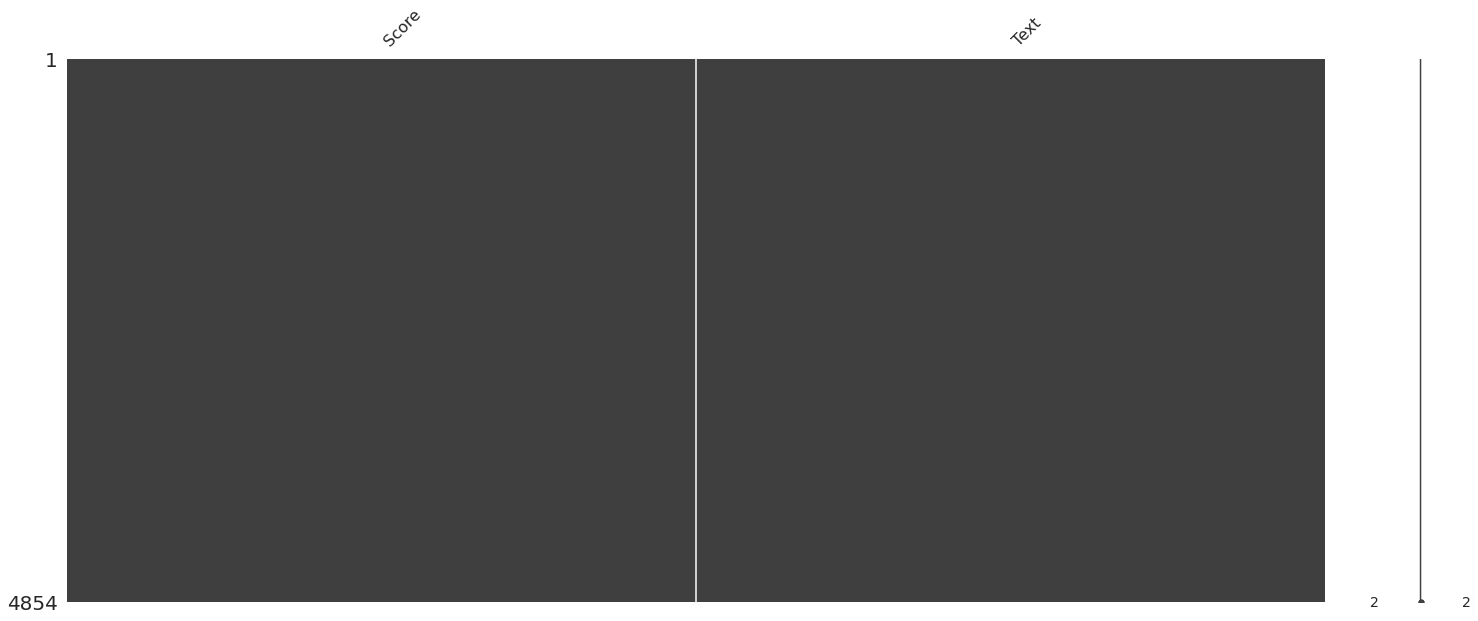

In [ ]:
msno.matrix(df)

**Analyzing the data using Sweetviz**

**Sweetviz** is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. **Output** is a fully self-contained **HTML** application.

The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

**[Click Here!](https://pypi.org/project/sweetviz/)** to learn more about Sweetviz

In [ ]:
#Installing Sweetviz

!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.2 MB/s 


In [ ]:
# Importing sweetviz
import sweetviz as sv

#Analyzing the dataset
report = sv.analyze(df)

#Display the report
report.show_html('Output.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df = df[['Text','Score']].dropna()

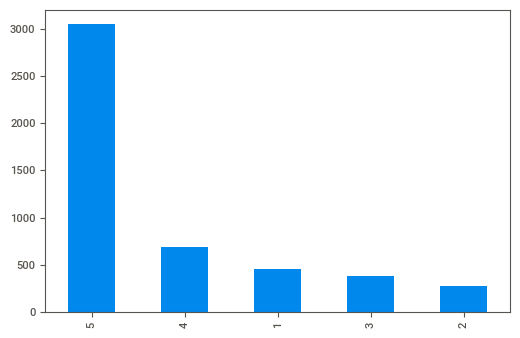

In [ ]:
plt.figure(figsize=(6,4))

df.Score.value_counts().plot(kind='bar')

plt.show()

___
**Observations:**
- The reviews follow a five-star rating system. We have more reviews with ratings 5, this can lead to unbalanced classes
- Let us treat rating 4 and 5 as positive and rest as negative reviews
___

In [ ]:
df.Score[df.Score<=3]=0

df.Score[df.Score>=4]=1

<ipython-input-27-63675334bf1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Score[df.Score<=3]=0
<ipython-input-27-63675334bf1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Score[df.Score>=4]=1


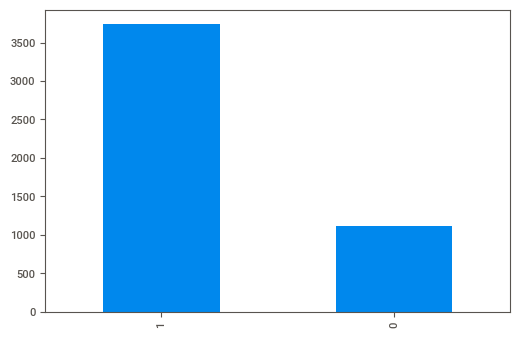

In [ ]:
plt.figure(figsize=(6,4))

df.Score.value_counts().plot(kind='bar')

plt.show()

In [ ]:
df.head(4)

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0


In [ ]:
df.groupby('Score').Score.count()

Score
0    1117
1    3737
Name: Score, dtype: int64

###Linguistic features: 

- **Tokenization**
- **Part-of-speech tagging**
- **Dependency parsing**
- **Lemmatization**
- **Named Entities Recognition**


In [ ]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Loading english language model
# A language model is a statistical model that lets us perform NLP tasks such as POS-tagging and NER-tagging
nlp = spacy.load('en_core_web_sm')

#Loading a random tweet from the data set 
review1 = df.Text[24]

print('Random Review:\n',review1)

Random Review:
 I have lived out of the US for over 7 yrs now, and I so miss my Twizzlers!!  When I go back to visit or someone visits me, I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer, more often than I'm able to buy them right now.


In [ ]:
#Calling the nlp() on a string and spaCy tokenizes the text and creates a document object
doc = nlp(review1)
print(doc)

I have lived out of the US for over 7 yrs now, and I so miss my Twizzlers!!  When I go back to visit or someone visits me, I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer, more often than I'm able to buy them right now.


___
- Tokenization
- Lemmatization
- POS Tagging
- Dependency Parsing
___

In [ ]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(doc):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,I,I,PRON,PRP,nsubj,X,True,True,False
1,have,"(have,)",AUX,VBP,aux,xxxx,True,True,False
2,lived,"(live,)",VERB,VBN,ROOT,xxxx,True,False,False
3,out,"(out,)",ADP,IN,prep,xxx,True,True,False
4,of,"(of,)",ADP,IN,prep,xx,True,True,False
5,the,"(the,)",DET,DT,det,xxx,True,True,False
6,US,"(US,)",PROPN,NNP,pobj,XX,True,True,False
7,for,"(for,)",ADP,IN,prep,xxx,True,True,False
8,over,"(over,)",ADP,IN,quantmod,xxxx,True,True,False
9,7,"(7,)",NUM,CD,nummod,d,False,False,False


####**Visualizing entities using displacy**

In [ ]:
spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
lt = ['GPE', 'CARDINAL']

for i in lt:
  print(spacy.explain(i))

Countries, cities, states
Numerals that do not fall under another type


####**Visualizing dependency parsing using displacy**

In [ ]:
spacy.displacy.render(doc, style='dep', jupyter=True,options={'distance': 140})

### Visualizing using **Explacy**

In [ ]:
import explacy

explacy.print_parse_info(nlp, df.Text[0])

Dep tree                Token       Dep type Lemma      Part of Sp
─────────────────────── ─────────── ──────── ────────── ──────────
                   ┌──► I           nsubj    I          PRON      
                   │┌─► have        aux      have       AUX       
┌┬┬┬───────────────┴┴── bought      ROOT     buy        VERB      
│││└─►┌──────────────── several     dobj     several    ADJ       
│││   └─►┌───────────── of          prep     of         ADP       
│││      │  ┌─────────► the         det      the        DET       
│││      │  │┌────────► Vitality    compound Vitality   PROPN     
│││      │  ││      ┌─► canned      amod     can        VERB      
│││      │  ││   ┌─►└── dog         compound dog        NOUN      
│││      │  ││┌─►└───── food        compound food       NOUN      
│││      └─►└┴┴──────── products    pobj     product    NOUN      
││└───────────────────► and         cc       and        CCONJ     
││                  ┌─► have        aux      have       AUX   

###  *Text Summarization:* ***Gensim*** 

- When you open news sites, do you just start reading every news article? Probably not. 
- We typically glance the short news summary and then read more details if interested. Short, informative summaries of the news is now everywhere like magazines, news aggregator apps, research sites, etc.

- It is possible to create the summaries automatically as the news comes in from various sources around the world.

- The method of extracting these summaries from the original huge text without losing vital information is called as **Text Summarization**. 

- **Google News**, **inshorts app** and various other news aggregator apps take advantage of text summarization algorithms.




[**Click Here!**](https://www.machinelearningplus.com/nlp/text-summarization-approaches-nlp-example/) to learn more about Text Summarization

**Types of Text Summarization Methods**

Two main methods of Text Summarization: 

- **Extractive** 
- **Abstractive**





### ***DATA SPLITTING***

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['reviews_without_stopwords'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                                if word not in (stopwords)]))

In [ ]:
print(len(df['reviews_without_stopwords'][2]))

342


In [ ]:
print(df['reviews_without_stopwords'][:4])

0    I bought several Vitality canned dog food prod...
1    Product arrived labeled Jumbo Salted Peanuts.....
2    This confection around centuries. It light, pi...
3    If looking secret ingredient Robitussin I beli...
Name: reviews_without_stopwords, dtype: object


In [ ]:
from nltk.stem import PorterStemmer 

In [ ]:
ps = PorterStemmer()

In [ ]:
df['reviews_porter_stemmed'] = df['reviews_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [ ]:
print(df['reviews_porter_stemmed'][0])

i bought sever vital can dog food product found good quality. the product look like stew process meat smell better. my labrador finicki appreci product better most.


In [ ]:
df['reviews_porter_stemmed'] = df['reviews_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [ ]:
print(df['reviews_porter_stemmed'][0])

i bought sever vital can dog food product found good quality. the product look like stew process meat smell better. my labrador finicki appreci product better most.


In [ ]:
df['reviews_porter_stemmed'] = df['reviews_porter_stemmed'].str.replace('[^\w\s]','')

In [ ]:
df['reviews_porter_stemmed'][0]

'i bought sever vital can dog food product found good quality the product look like stew process meat smell better my labrador finicki appreci product better most'

In [ ]:
freq = pd.Series(' '.join(df['reviews_porter_stemmed']).split()).value_counts()

In [ ]:
freq.head()

i       11914
it       2566
like     2218
br       2087
the      1994
dtype: int64

In [ ]:
freq2 = freq[freq <= 3]
freq2

newli         3
coke          3
barbecue      3
berries       3
badly         3
             ..
tastebuds     1
sodiumbr      1
100cal        1
bakedbr       1
newmansbon    1
Length: 10993, dtype: int64

In [ ]:
freq3 = list(freq2.index.values)

In [ ]:
df['reviews_porter_stemmed'] = df['reviews_porter_stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq3)]))

In [ ]:
df.head(4)

,Text,Score,reviews_without_stopwords,reviews_porter_stemmed
0,I have bought several of the Vitality canned d...,1,I bought several Vitality canned dog food prod...,i bought sever can dog food product found good...
1,Product arrived labeled as Jumbo Salted Peanut...,0,Product arrived labeled Jumbo Salted Peanuts.....,product arriv label salt peanut actual small s...
2,This is a confection that has been around a fe...,1,"This confection around centuries. It light, pi...",thi around it light citru nut case and cut tin...
3,If you are looking for the secret ingredient i...,0,If looking secret ingredient Robitussin I beli...,if look secret ingredi i believ i found it i g...


In [ ]:
data1 = df[['Score', 'reviews_porter_stemmed']]

In [ ]:
data1.head(4)

,Score,reviews_porter_stemmed
0,1,i bought sever can dog food product found good...
1,0,product arriv label salt peanut actual small s...
2,1,thi around it light citru nut case and cut tin...
3,0,if look secret ingredi i believ i found it i g...


In [ ]:
data1.groupby('Score').Score.count()

Score
0    1117
1    3737
Name: Score, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [ ]:
features = tfidf.fit_transform(data1.reviews_porter_stemmed).toarray()
labels = df.Score
features.shape
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
labels[0:2]

0    1
1    0
Name: Score, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.770340
1,RandomForestClassifier,1,0.770340
2,RandomForestClassifier,2,0.769310
3,RandomForestClassifier,3,0.769310
4,RandomForestClassifier,4,0.770103
5,MultinomialNB,0,0.772400
6,MultinomialNB,1,0.783728
7,MultinomialNB,2,0.781668
8,MultinomialNB,3,0.778579
9,MultinomialNB,4,0.781443


In [ ]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data1.index, test_size=0.05, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [ ]:
indices_test

Int64Index([ 415, 3977, 4517, 1328, 4445, 3405, 1529, 1649, 1834, 2483,
            ...
            2166, 3609, 1526, 2678, 2087, 3460, 1819,  939, 2164, 1791],
           dtype='int64', length=243)

In [ ]:
model.fit(features, labels)

LogisticRegression(random_state=0)

In [ ]:
texts = ['If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.']

text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format([predicted]))
    print("")

"If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal."
  - Predicted as: '[1]'

